<a href="https://colab.research.google.com/github/javed075/Spark-foundation-superstore-EDA/blob/main/super_store_EDA_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploratory Data Analysis - Retail**
 <li>Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

<li>As a business manager, try to find out the weak areas where you can work to make more profit.

<li>What all business problems you can derive by exploring the data?

<li>I used Python to perform EDA on this dataset.

dataset=https://tinyurl.com/52ejfkzc



#**NAME-** JAVED AHMAD#

###Mount google drive on colab notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###import important library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###upload csv file

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Almabetter/SPARK FOUNDATION/SampleSuperstore.csv')

#**Know our DataSet**

In [ ]:
#top 5 rows
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
#last 5 rows
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [ ]:
#count number of rows and column
df.shape

(9994, 13)

In [ ]:
#all the column name
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
#basic information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
# check for null value
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
# for number of unique value in each column
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [ ]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
#unique value in Category column 
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
#unique value in sub category
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [ ]:
# drop postal code column from our dataset
df=df.drop('Postal Code',axis=1)

#**DATA VISUALIZATION**

### Let's divide overall data .Create a dataframe where profit is negative and concentrate on those areas to improve it.

In [ ]:
loss_area=df[df['Profit']<0]

In [ ]:
loss_area

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
9921,Standard Class,Home Office,United States,Akron,Ohio,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
9931,Standard Class,Consumer,United States,San Bernardino,California,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9937,Second Class,Corporate,United States,Los Angeles,California,West,Furniture,Tables,71.0880,2,0.20,-1.7772


In [ ]:
# find total loss of superstore
loss=loss_area['Profit'].sum()
print(f"total loss in loss data set is :{loss}")



total loss in loss data set is :-156131.2857


In [ ]:
X=loss_area.groupby('Segment').sum()
X

,Sales,Quantity,Discount,Profit
Segment,,,,
Consumer,247196.2460,3651,476.76,-84945.7112
Corporate,131860.5383,2191,272.00,-44787.2076
Home Office,89650.3705,1198,150.98,-26398.3669


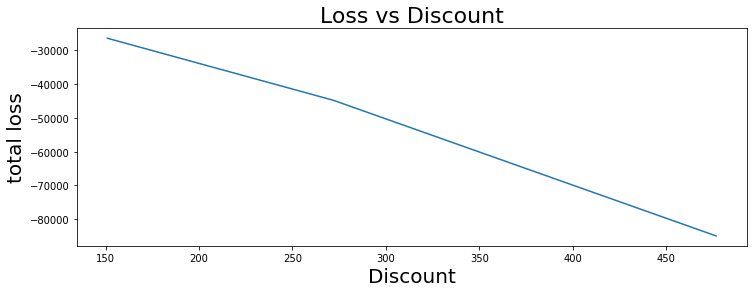

In [ ]:
plt.figure(figsize=(12,4))
plt.xlabel('Discount',fontsize=20);
plt.ylabel('total loss',fontsize=20);
plt.title('Loss vs Discount',fontsize=22)
sns.lineplot(x='Discount',y='Profit',data=X)
plt.show()

###More discount leads to more loss so through offering less discounts more profit is made.

In [ ]:
loss_area.groupby(by='Sub-Category').sum()

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Accessories,10958.8000,330,18.20,-930.6265
Appliances,3382.5340,235,53.60,-8629.6412
Binders,36140.6130,2456,452.40,-38510.4964
Bookcases,48072.7408,422,37.99,-12152.2060
Chairs,91988.4560,876,61.40,-9880.8413
Fasteners,149.2800,55,2.40,-33.1952
Furnishings,12845.8440,597,88.60,-6490.9134
Machines,72456.2530,157,25.60,-30118.6682
Phones,35797.8400,476,46.60,-7530.6235


###More loss is in Binders,machines,tables compared to others.
### by giving huge discount on Binders,they getting more saled. 
### so better to give discounts on those items which are getting less saled so that even they will start getting saled more.

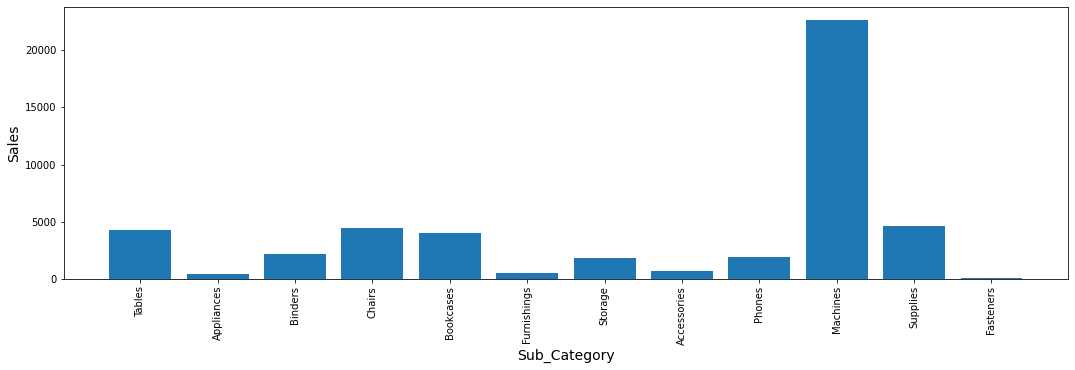

In [ ]:
plt.rcParams['figure.figsize']=(18,5)
plt.bar(loss_area['Sub-Category'],loss_area['Sales'])
plt.xlabel('Sub_Category',fontsize =14);
plt.ylabel('Sales',fontsize =14);
plt.xticks(rotation=90)
plt.show()

###Sales is very less in Appliances,furnishing and fastner items so they have improve by marketting technique. 

In [67]:
# top 10 state where loss is more.
states_loss=df.groupby(by='State')['Profit'].sum().sort_values().head(10)
states_loss

State
Texas            -25729.3563
Ohio             -16971.3766
Pennsylvania     -15559.9603
Illinois         -12607.8870
North Carolina    -7490.9122
Colorado          -6527.8579
Tennessee         -5341.6936
Arizona           -3427.9246
Florida           -3399.3017
Oregon            -1190.4705
Name: Profit, dtype: float64

### the sales in these state have to be increased by giving some offer.

### Lets move on our main data set

In [68]:
df

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [ ]:
#analyze sales over category and sub category
df1=df.groupby(['Category','Sub-Category'],as_index=False)['Sales'].max()
df1

,Category,Sub-Category,Sales
0,Furniture,Bookcases,4404.900
1,Furniture,Chairs,4416.174
2,Furniture,Furnishings,1336.440
3,Furniture,Tables,4297.644
4,Office Supplies,Appliances,2625.120
5,Office Supplies,Art,1113.024
6,Office Supplies,Binders,9892.740
7,Office Supplies,Envelopes,604.656
8,Office Supplies,Fasteners,93.360
9,Office Supplies,Labels,786.480


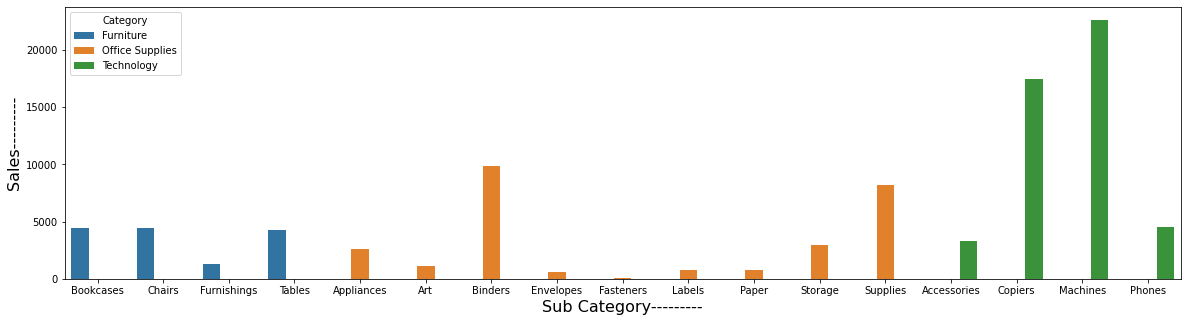

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Sub-Category',y='Sales',data=df1,hue='Category')
plt.xlabel('Sub Category---------',fontsize=16)
plt.ylabel('Sales---------',fontsize=16)
plt.show()

###We have to increase sales of furnishing in furniture category,fastner,envelope,Labels in office supplies and phones,Acessories in technology category. for this we can some offer or through advertisment. 

In [ ]:

# top 10 state where loss is more.
states_loss=df.groupby(by='State')['Profit'].sum().sort_values().head(10)
states_loss

State
Texas            -25729.3563
Ohio             -16971.3766
Pennsylvania     -15559.9603
Illinois         -12607.8870
North Carolina    -7490.9122
Colorado          -6527.8579
Tennessee         -5341.6936
Arizona           -3427.9246
Florida           -3399.3017
Oregon            -1190.4705
Name: Profit, dtype: float64

### the sales in these state have to be increased by giving some offer.

In [ ]:
df2=df.groupby(['Region'],as_index=False)['Sales'].sum()
df2

,Region,Sales
0,Central,501239.8908
1,East,678781.2400
2,South,391721.9050
3,West,725457.8245


In [ ]:
# profit over sub categories
df6=df.groupby(['Sub-Category'],as_index=False)['Profit'].sum()
df6

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


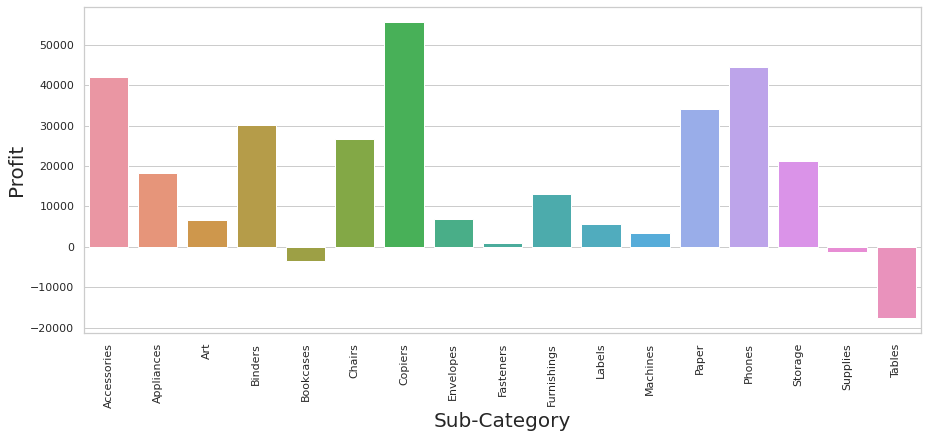

In [ ]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.xlabel('Sub-Category',fontsize=20);
plt.ylabel('total Profit',fontsize=20);
sns.barplot(x='Sub-Category',y='Profit',data=df6,ci= None)
plt.show()

### by this chart it clearly seen that Tables,supplies,Bookcases in more loss even their sale is good.so have to give appropiate discount on these sub categories items.

In [ ]:
segement_over_sales=df.groupby(['Segment'],as_index=False)['Sales'].sum()
segement_over_sales

,Segment,Sales
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


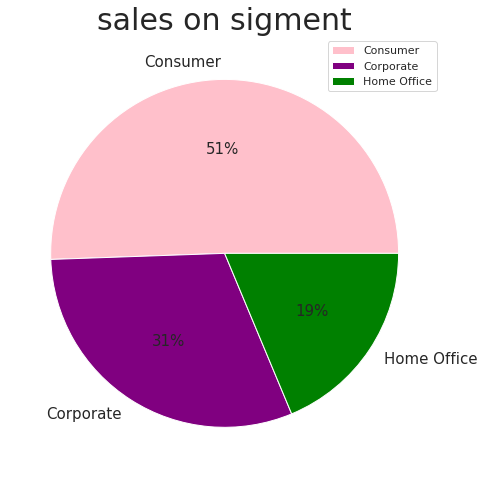

In [ ]:
# plotting pie chart
plt.figure(figsize=(10,8))
plt.title('sales on sigment', fontsize=30)
plt.pie(segement_over_sales['Sales'],labels=segement_over_sales['Segment'],autopct='%2.0f%%',colors=['pink','purple','green'],
        textprops={'fontsize':15})
plt.legend(loc=1)
plt.show()

In [ ]:
# sales over region
df2=df.groupby(['Region'],as_index=False)['Sales'].sum()
df2

,Region,Sales
0,Central,501239.8908
1,East,678781.2400
2,South,391721.9050
3,West,725457.8245


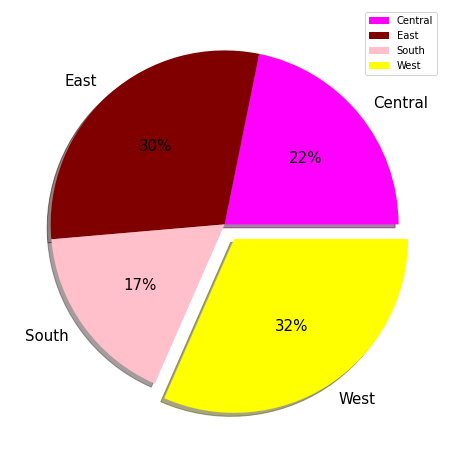

In [ ]:
plt.figure(figsize=(10,8))
c=['magenta','maroon','pink','yellow']
ex=[0.0,0.0,0.0,0.1]
plt.pie(df2['Sales'],labels=df2['Region'],autopct='%2.0f%%',colors=c, textprops={'fontsize':15},shadow=True,explode=ex)
plt.legend(loc=1)
plt.show()

###Sales is high in west region and low in south region.

In [ ]:
df3=df.groupby(by='Ship Mode',as_index=False)['Quantity'].sum()
df3

,Ship Mode,Quantity
0,First Class,5693
1,Same Day,1960
2,Second Class,7423
3,Standard Class,22797


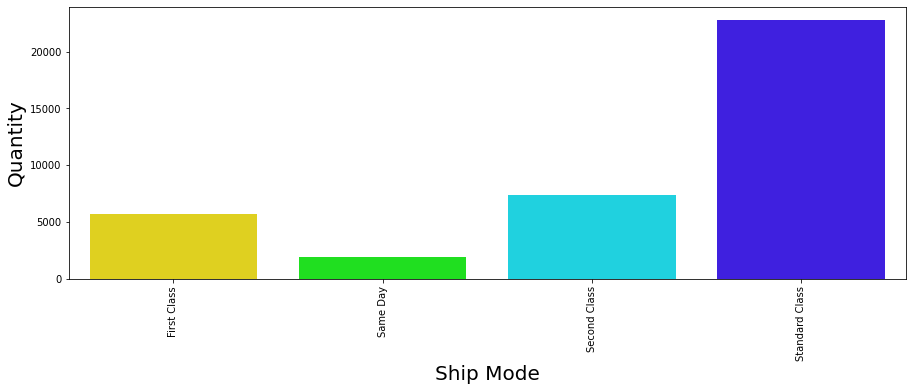

In [ ]:
# count plot
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.xlabel('Ship Mode',fontsize=20);
plt.ylabel('total Quantity Order',fontsize=20);
category_graph = sns.barplot(x =df3['Ship Mode'], y =df3['Quantity'],palette='gist_rainbow')


###more the quantity ordered through Standard class ship mode. we have to improve of our Same Day ship mode better.

In [ ]:
grp=df.groupby('Ship Mode')
profit_by_ship_mode=grp['Profit'].sum().reset_index()
profit_by_ship_mode

,Ship Mode,Profit
0,First Class,48969.8399
1,Same Day,15891.7589
2,Second Class,57446.6354
3,Standard Class,164088.7875


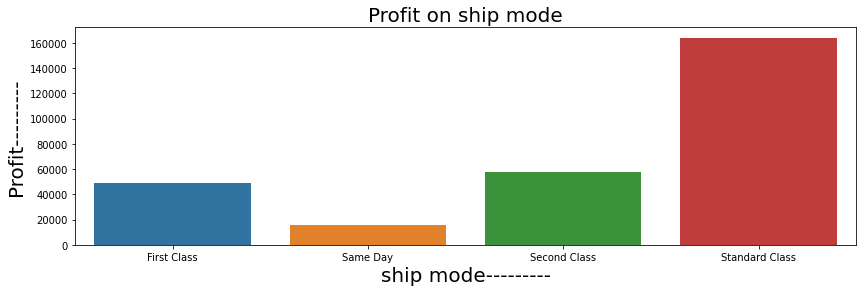

In [ ]:
plt.figure(figsize=(14,4))
sns.barplot(x='Ship Mode',y='Profit',data=profit_by_ship_mode)
plt.title('Profit on ship mode',fontsize=20)
plt.xlabel('ship mode---------',fontsize=20)
plt.ylabel('Profit---------',fontsize=20)
plt.show()

### profit is also more in standard class ship mode.

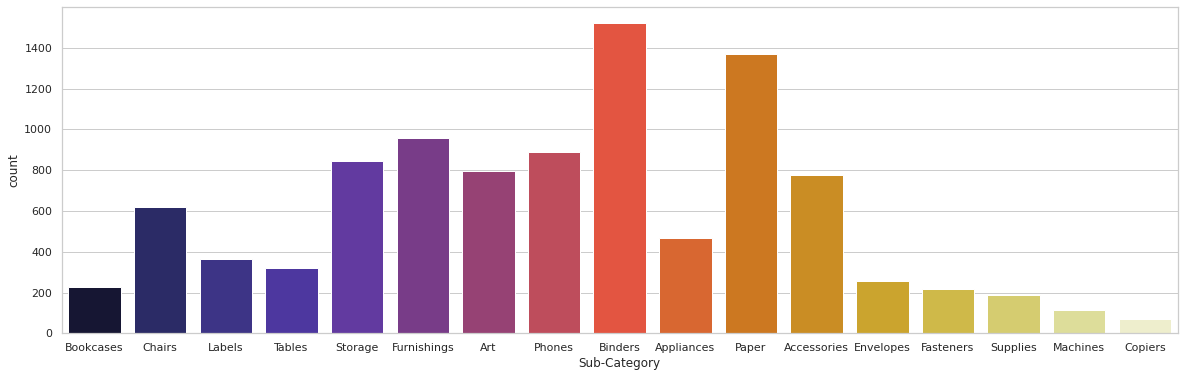

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(x='Sub-Category',data=df,palette='CMRmap')
plt.show()

###The maximum quantity of product in demand was in range 2-4.

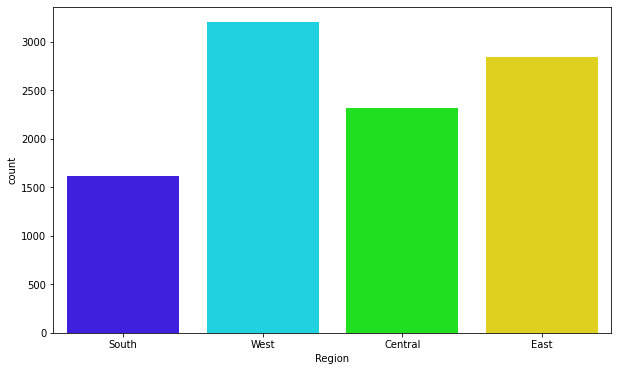

In [ ]:
#countplot
plt.figure(figsize = (10,6))
sns.countplot(x='Region',data=df,palette='gist_rainbow_r')
plt.show()

### more number of order by west and East region.

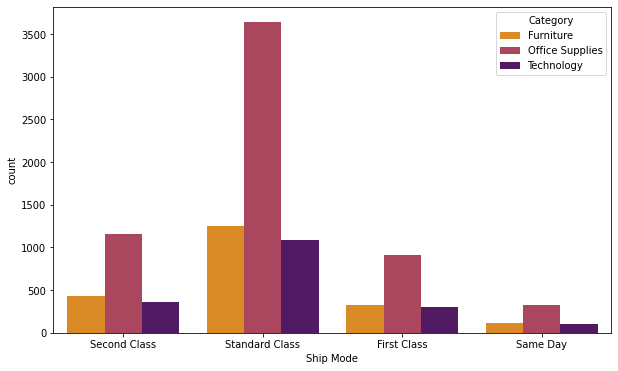

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(x='Ship Mode',data=df,hue='Category',palette='inferno_r')
plt.show()

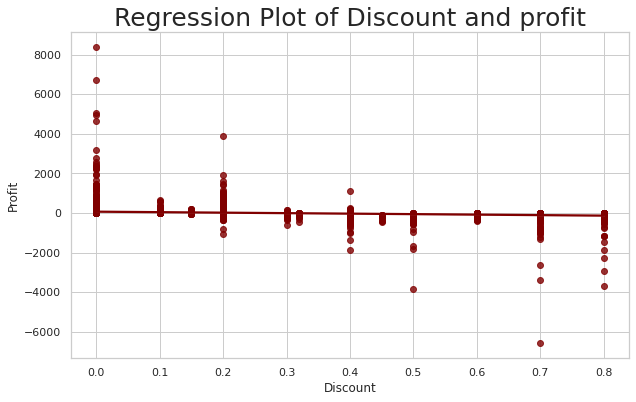

In [ ]:
#Regression Plot Of Sales And Discount
plt.figure(figsize = (10,6))
sns.regplot(x="Discount",y="Profit",data=df,color='maroon')
plt.title("Regression Plot of Discount and profit",fontsize=25)
plt.show()


### The regression plot clearly say that as we increase the discount our profit also decresed.

In [ ]:
# correlation betwen columns
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


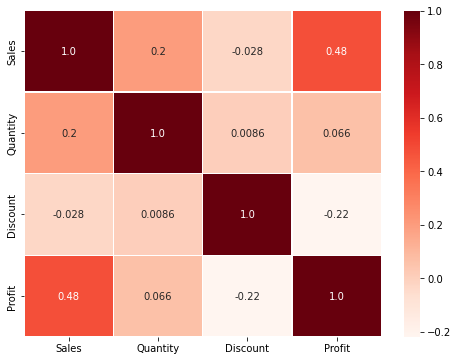

In [ ]:
# plotting correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='Reds',annot=True,linewidths=0.4,fmt='.2')
plt.show()

### by heat map it clearly seen that Sales and profit are highly correlated.It also visible that discount and profit are highly negative correlated. 

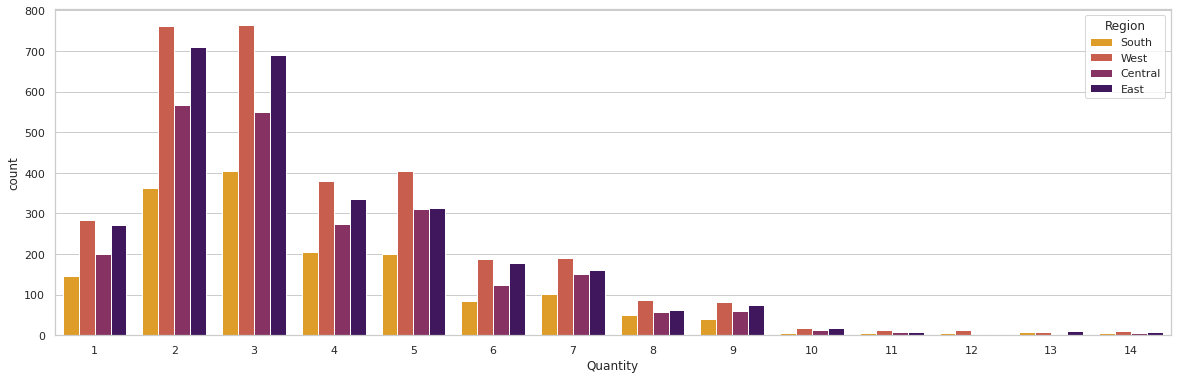

In [ ]:
# count plot
plt.figure(figsize = (20,6))
sns.countplot(x='Quantity',data=df,hue='Region',palette='inferno_r')
plt.show()

###by count chart it clearly visible that maximun nuber of quantity lies between 2 to 3. and is maximum from east and west region.

# Overall Conclusion
<ul> 
     <li>Main reason which leads to loss is Discount.Some areas leads lo loss due to more discounts and some areas leads to less sales due to less discounts. It needs to be improved.  </li>
    <li>It is better to give more discounts during festival seasons. So that more sales are made.</li>
    <li>Home office segment needs better improvement.</li>
    <li>Some cities have very less sales. It may be due to lack of awareness. So advertising in those cities will leads to sales. </li>
    <li> Shipping mode has to be improved for better performance.
    <li>The south region required more advertisment.
</ul>

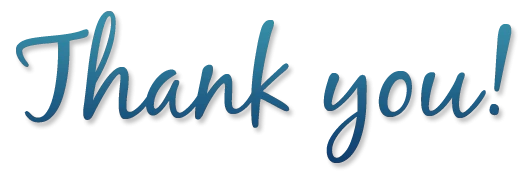